# New York City Taxi Fare Prediction
# Can you predict a rider's taxi fare?

In [276]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# i choose regression because here in the output i require a data which is predicting price which is also an integer value,here i am not classifying or grouping the output to certain labels,hence iam using only regression.

# dataset


In [277]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

# description about data


In [278]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


# 2objects unique id and date_time_of_pickup we will remove unique id and convert the the type of date_time_of_pickup

In [279]:
df.drop(columns=['unique_id'], inplace=True)


In [280]:
 df.head(10)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [281]:
d=df['date_time_of_pickup']
import datetime

In [282]:
for i,row in df.iterrows():
    dt=datetime.datetime.strptime(row['date_time_of_pickup'], '%Y-%m-%d %H:%M:%S UTC')
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    
    

In [283]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_week,pickup_time
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.0,17.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,1.0,16.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,3.0,0.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,5.0,4.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.0,7.0


<AxesSubplot:xlabel='no_of_passenger', ylabel='count'>

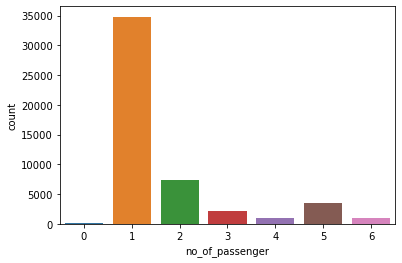

In [284]:
sns.countplot(x=df['no_of_passenger'])

In [285]:
corr_matrix = df.corr()
corr_matrix['amount']

amount                  1.000000
longitude_of_pickup     0.005944
latitude_of_pickup     -0.007338
longitude_of_dropoff    0.004286
latitude_of_dropoff    -0.005442
no_of_passenger         0.016583
day_of_week             0.000520
pickup_time            -0.022018
Name: amount, dtype: float64

In [286]:
from math import sqrt

for i,row in df.iterrows():
    X =   54.6 * (row['longitude_of_dropoff'] - row['longitude_of_pickup'])
    Y= 69.0 * (row['latitude_of_dropoff'] - row['latitude_of_pickup']) 
    distance = sqrt(X**2 + Y**2)
    df.at[i, 'distance'] = distance

In [287]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_week,pickup_time,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.0,17.0,0.641024
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,1.0,16.0,5.275538
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,3.0,0.0,0.872636
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,5.0,4.0,1.738444
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.0,7.0,1.253707


In [288]:
df.drop(columns=['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff'], inplace=True)
df.head()

,amount,no_of_passenger,day_of_week,pickup_time,distance
0,4.5,1,0.0,17.0,0.641024
1,16.9,1,1.0,16.0,5.275538
2,5.7,2,3.0,0.0,0.872636
3,7.7,1,5.0,4.0,1.738444
4,5.3,1,1.0,7.0,1.253707


# removing duplicates

In [289]:
duplicates=df.duplicated()

In [290]:
print(duplicates.sum())

100


In [291]:
df.drop_duplicates(inplace=True)

In [292]:
df.duplicated().sum()

0

# removing outliers

# first we shall have a box plot

In [293]:
df.describe()

,amount,no_of_passenger,day_of_week,pickup_time,distance
count,49900.000000,49900.000000,49900.000000,49900.000000,49900.000000
mean,11.372400,1.669118,3.030521,13.488377,11.368789
std,9.689317,1.290147,1.956933,6.507875,232.563516
min,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,1.000000,9.000000,0.776633
50%,8.500000,1.000000,3.000000,14.000000,1.341143
75%,12.500000,2.000000,5.000000,19.000000,2.453591
max,200.000000,6.000000,6.000000,23.000000,24861.003946


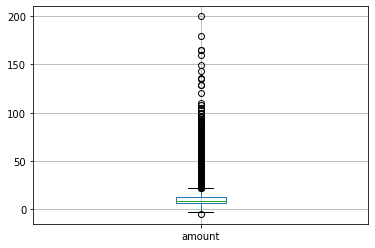

In [294]:
df.boxplot(column='amount')
plt.show()

In [295]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    print(q3)
    print(q1)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
   
    return lower_bound,upper_bound

In [296]:
lowacc,highacc=remove_outlier(df["amount"])

12.5
6.0


In [297]:
df["amount"]=np.where(df["amount"]>highacc,highacc,df["amount"])
df["amount"]=np.where(df["amount"]<lowacc,lowacc,df["amount"])

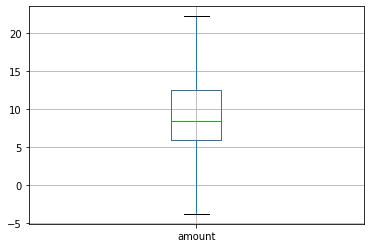

In [298]:
df.boxplot(column='amount')
plt.show()

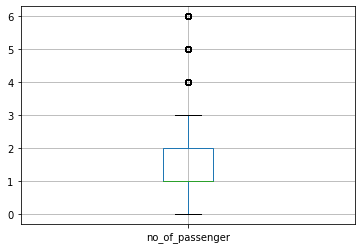

In [299]:
df.boxplot(column='no_of_passenger')
plt.show()

In [300]:
lowpass,highpass=remove_outlier(df["no_of_passenger"])

2.0
1.0


In [301]:
df["no_of_passenger"]=np.where(df["no_of_passenger"]>highpass,highpass,df["no_of_passenger"])
df["no_of_passenger"]=np.where(df["no_of_passenger"]<lowpass,lowpass,df["no_of_passenger"])

<AxesSubplot:>

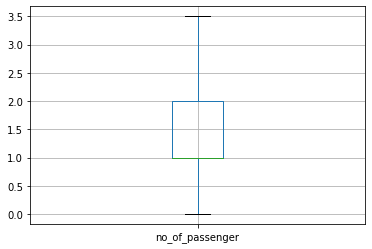

In [302]:
df.boxplot(column='no_of_passenger')


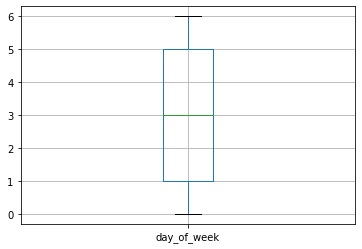

In [303]:
df.boxplot(column='day_of_week')
plt.show()

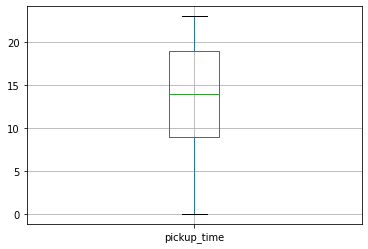

In [304]:
df.boxplot(column='pickup_time')
plt.show()

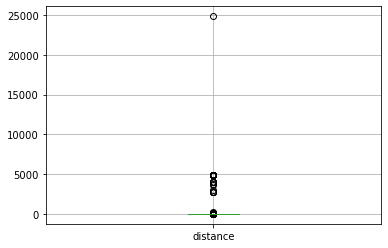

In [305]:
df.boxplot(column='distance')
plt.show()

In [306]:
lowdis,highdis=remove_outlier(df["distance"])

2.4535910398064136
0.7766331092444614


In [307]:
df["distance"]=np.where(df["distance"]>highdis,highdis,df["distance"])
df["distance"]=np.where(df["distance"]<lowdis,lowdis,df["distance"])

<AxesSubplot:>

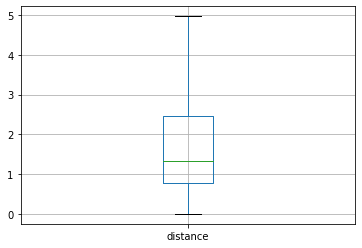

In [308]:
df.boxplot(column='distance')

In [309]:
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount             1.000000
distance           0.844653
no_of_passenger    0.018094
day_of_week        0.012905
pickup_time       -0.025280
Name: amount, dtype: float64

In [310]:
x = df.drop(['amount'], axis=1)
y = df['amount']

In [311]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

# linear regression model

In [312]:
from sklearn.linear_model import LinearRegression

In [313]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [314]:
model.score(x_train, y_train)

0.7149068083289931

In [315]:
model.score(x_test,y_test)

0.7021762662623825

In [316]:
predict=model.predict(x_test)

In [317]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y,cv=10).mean()

0.7136110196626216

In [318]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, model.predict(x_test))

1.9864579651496896

# Train the Gradient booster regression

In [319]:
from sklearn.ensemble import GradientBoostingRegressor



In [320]:
model = GradientBoostingRegressor(random_state=0,n_estimators=350,max_depth=5,learning_rate=0.01)
model.fit(x_train, y_train)



GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=350,
                          random_state=0)

In [321]:
model.score(x_train,y_train)

0.7662317192511329

In [322]:
model.score(x_test,y_test)

0.7551569705063674

# predict fare for 2 miles ,2 passegers,friday,time 5:00pm clock

In [323]:
model.predict([[2,4,17,2.0]])

array([11.63147461])

# Now predicting the fare amount for 2-miles at 5.00pm on sunday

In [324]:
model.predict([[2,6,17,2.0]])

array([11.11033883])

# Ridge algo

In [331]:
 from sklearn.linear_model import Ridge

In [341]:
model= Ridge(alpha=0.5,solver='auto',tol=0.001)

In [342]:
model.fit(x_train, y_train)

Ridge(alpha=0.5)

In [343]:
model.score(x_train, y_train)

0.7149068083061831